In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the website URL
url = 'https://www.naukri.com/analytics-jobs?src=discovery_trendingWdgt_homepage_srch'
response = requests.get(url)

# Create BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the job listings section
results = soup.find(class_='list')

# Create an empty DataFrame to store the scraped data
df = pd.DataFrame(columns=['Title', 'Company', 'Description', 'Skills', 'Experience', 'Salary', 'Location', 'URL'])

# Iterate over each job listing and extract the required information
for job_elem in results.find_all('article', class_='jobTuple'):
    # Extract the job title
    title = job_elem.find('a', class_='title').text.strip()
    
    # Extract the company name
    company = job_elem.find('a', class_='subTitle').text.strip()
    
    # Extract the job description
    description = job_elem.find('li', class_='job-description').text.strip()
    
    # Extract the experience required
    experience = job_elem.find('li', class_='experience').text.strip()
    
    # Extract the salary information
    salary = job_elem.find('li', class_='salary').text.strip()
    
    # Extract the location
    location = job_elem.find('li', class_='location').text.strip()
    
    # Extract the job details URL
    job_url = job_elem.find('a', class_='title')['href']
    
    # Send a GET request to the job details URL
    job_response = requests.get(job_url)
    job_soup = BeautifulSoup(job_response.content, 'html.parser')
    
    # Extract the skills from the job details page
    skills = job_soup.find(class_='key-skill').text.strip().replace('Key Skills', '')
    
    # Append the scraped data to the DataFrame
    df = df.append({'Title': title, 'Company': company, 'Description': description, 'Skills': skills,
                    'Experience': experience, 'Salary': salary, 'Location': location, 'URL': job_url},
                   ignore_index=True)

# Print the scraped data
print(df)


AttributeError: 'NoneType' object has no attribute 'find_all'

In [35]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import pandas as pd

In [36]:
chrome_driver_path = r"C:/Users/LENOVO/Desktop/Job Recommendation System/data/chromedriver.exe"

# Configure the ChromeDriver service
service = Service(chrome_driver_path)

# Start the WebDriver
driver = webdriver.Chrome(service=service)

In [37]:
# Send a GET request to the job listings page
url = 'https://www.naukri.com/analytics-jobs?src=discovery_trendingWdgt_homepage_srch'
driver.get(url)

time.sleep(3)

<html data-theme="one-theme" lang="en">
 <head>
  <title>
   Analytics Jobs, 7930 Analytics Job Vacancies In June 2023 - Naukri.com
  </title>
  <meta content="Apply To 7930 Analytics Jobs On Naukri.com, #1 Job Portal In India. Explore Analytics Job Openings In Your Desired Locations Now!" name="description"/>
  <link href="android-app://naukriApp.appModules.login/https/www.naukri.com/analytics-jobs" rel="alternate"/>
  <link href="https://www.naukri.com/analytics-jobs" rel="canonical"/>
  <meta content="jobsearch" name="atdlayout"/>
  <meta content="ALL" name="robots"/>
  <meta content="Jobs &amp; Career: Job Search, Apply Jobs, Post Jobs" name="classification"/>
  <meta content="no-cache" name="pragma"/>
  <meta content="general" name="rating"/>
  <meta content="1 day" name="revisit-after"/>
  <meta content="GLOBAL" name="distribution"/>
  <meta content="document" name="resource-type"/>
  <meta content="www.naukri.com" name="author"/>
  <meta content="EN" name="content-language"/>
  
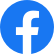
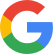

In [38]:
soup = BeautifulSoup(driver.page_source, 'lxml')

print(soup.prettify())

In [46]:

# Find all job listing elements
job_elems = soup.find_all('article', class_='jobTuple')

# Initialize an empty DataFrame to store the data
df = pd.DataFrame(columns=['Title', 'Company', 'Description', 'Skills', 'Experience', 'Salary', 'Location', 'URL'])

# Iterate over each job element and scrape data from each page
for job_elem in job_elems:
    # Title
    title = job_elem.find('a', class_='title ellipsis').text.strip()
    
    # Company
    company = job_elem.find('a', class_='subTitle ellipsis fleft').text.strip()
    
    # Description
    description = job_elem.find('div', class_='ellipsis job-description').text.strip()
    
    # Experience
    experience = job_elem.find('li', class_='fleft br2 placeHolderLi experience').find('span').text.strip()
    
    # Salary
    salary = job_elem.find('li', class_='fleft br2 placeHolderLi salary').find('span').text.strip()
    
    # Location
    location = job_elem.find('li', class_='fleft br2 placeHolderLi location').find('span').text.strip()
    
    # URL
    url = job_elem.find('a', class_='title ellipsis')['href']
    
    # Send a GET request to the job page
    job_response = requests.get(url)
    job_soup = BeautifulSoup(job_response.text, 'html.parser')
    
    # Skills
    skills_elem = job_soup.find('div', class_='key-skill')
    if skills_elem:
        skills = [skill.text.strip() for skill in skills_elem.find_all('span')]
    else:
        skills = 'No skills found'
    
    # Add the data to the DataFrame
    df = df.append({
        'Title': title,
        'Company': company,
        'Description': description,
        'Skills': skills,
        'Experience': experience,
        'Salary': salary,
        'Location': location,
        'URL': url
    }, ignore_index=True)

# Print the DataFrame
print(df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4916\10875030.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4916\10875030.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4916\10875030.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4916\10875030.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4916\10875030.py:42: FutureWarning: The frame.append method is deprecated and will 

                                                Title  \
0                                  Business Analyst I   
1                       Senior Analyst- Data Platform   
2   CN - Strategy - MC - CFO EV - Enterprise Perfo...   
3                                    Business Analyst   
4                  CN - SONG - ACE - Google - Analyst   
5                                Sr. Business Analyst   
6   CN - Strategy - MC - T&O - Organizational Anal...   
7                                        Data Analyst   
8     CN - Life Science - Analytics - Consultant - 09   
9                                    Business analyst   
10                                   Business Analyst   
11               Risk Advisory Data Analytics Analyst   
12                      Process Lead - Hire To Retire   
13                                   Business Analyst   
14                                   Business Analyst   
15               Network Optimization Program Manager   
16                Professional 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4916\10875030.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


In [48]:
df.to_csv(r"C:\Users\LENOVO\Desktop\Job Recommendation System\data\scrap.csv",index=False)

In [ ]:
df=df.append({'URL':url,'Title':Title.text,'Company':Company.text,'Experience':Experience,'Salary':Salary,'Location':Location},ignore_index = True)

In [40]:

# Find all job listing elements
job_elems = soup.find_all('div', class_='list')

# Initialize an empty DataFrame to store the data
df = pd.DataFrame(columns=['Title', 'Company', 'Description', 'Skills', 'Experience', 'Salary', 'Location', 'URL'])

job_elems

[<div class="list"><article class="jobTuple" data-job-id="050623501189"><div class="jobTupleHeader"><div class="info fleft"><a class="title ellipsis" href="https://www.naukri.com/job-listings-business-analyst-i-icon-clinical-research-india-private-limited-chennai-trivandrum-thiruvananthapuram-2-to-5-years-050623501189" target="_blank" title="Business Analyst I">Business Analyst I</a><div class="companyInfo subheading"><a class="subTitle ellipsis fleft" href="https://www.naukri.com/icon-plc-jobs-careers-144953" target="_blank" title="ICON plc">ICON plc</a><span class="starRating fleft" title="Powered by Ambition Box"><i class="naukicon naukicon-rating-yellow-star fright"></i>4.2</span><a class="reviewsCount fleft" href="https://www.ambitionbox.com/reviews/icon-plc-reviews?utm_campaign=srp_ratings&amp;utm_medium=desktop&amp;utm_source=naukri" target="_blank" title="Powered by Ambition Box">426 Reviews</a></div></div><ul class=""><li class="fleft br2 placeHolderLi experience"><i class="fl

In [41]:
df.head()

,Title,Company,Description,Skills,Experience,Salary,Location,URL


In [22]:
# Iterate over each job element and scrape data from each page
for job_elem in job_elems:
    # Title
    title = job_elem.find('a', class_='title ellipsis').text.strip()
    
    # Company
    company = job_elem.find('a', class_='subTitle ellipsis fleft').text.strip()
    
    # Description
    description = job_elem.find('div', class_='ellipsis job-description').text.strip()
    
    # Experience
    experience = job_elem.find('li', class_='fleft br2 placeHolderLi experience').find('span').text.strip()
    
    # Salary
    salary = job_elem.find('li', class_='fleft br2 placeHolderLi salary').find('span').text.strip()
    
    # Location
    location = job_elem.find('li', class_='fleft br2 placeHolderLi location').find('span').text.strip()
    
    # URL
    url = job_elem.find('a', class_='title ellipsis')['href']
    
    # Send a GET request to the job page
    job_response = requests.get(url)
    job_soup = BeautifulSoup(job_response.text, 'html.parser')
    
    # Skills
    skills_elem = job_soup.find('div', class_='key-skill')
    if skills_elem:
        skills = [skill.text.strip() for skill in skills_elem.find_all('span')]
    else:
        skills = 'No skills found'
    
    # Add the data to the DataFrame
    df = df.append({
        'Title': title,
        'Company': company,
        'Description': description,
        'Skills': skills,
        'Experience': experience,
        'Salary': salary,
        'Location': location,
        'URL': url
    }, ignore_index=True)

# Print the DataFrame
print(df)

Empty DataFrame
Columns: [Title, Company, Description, Skills, Experience, Salary, Location, URL]
Index: []
